In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/traffic-accident-prediction/dataset_traffic_accident_prediction1.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import random as rm
import sqlite3 as sql
print("Imports installed")

Imports installed


In [3]:
df = pd.read_csv("/kaggle/input/traffic-accident-prediction/dataset_traffic_accident_prediction1.csv")
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


In [4]:
empties = (df.isnull().sum().sum())
print(f'You have {empties}  null values within the dataset')
df_cleaned = df.dropna()
df_cleaned.head()
df_cleaned.info()



You have 588  null values within the dataset
<class 'pandas.core.frame.DataFrame'>
Index: 405 entries, 2 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               405 non-null    object 
 1   Road_Type             405 non-null    object 
 2   Time_of_Day           405 non-null    object 
 3   Traffic_Density       405 non-null    float64
 4   Speed_Limit           405 non-null    float64
 5   Number_of_Vehicles    405 non-null    float64
 6   Driver_Alcohol        405 non-null    float64
 7   Accident_Severity     405 non-null    object 
 8   Road_Condition        405 non-null    object 
 9   Vehicle_Type          405 non-null    object 
 10  Driver_Age            405 non-null    float64
 11  Driver_Experience     405 non-null    float64
 12  Road_Light_Condition  405 non-null    object 
 13  Accident              405 non-null    float64
dtypes: float64(7), object(7)
memory us

In [5]:
Weather = df_cleaned['Weather']
unique_weather = df_cleaned["Weather"].unique()
print(unique_weather)

rainy_days = 0
clear_days = 0
foggy_days = 0
stormy_days = 0
snowy_days = 0

for i in Weather:
    if i == "Rainy":
        rainy_days += 1
    elif i == "Clear":
        clear_days += 1
    elif i == "Foggy":
        foggy_days += 1
    elif i == "Stormy":
        stormy_days += 1
    elif i == "Snowy":
        snowy_days += 1

print(f'''Frequency of weather patterns are--
{rainy_days}: Rainy Days
{clear_days}: Clear Days
{foggy_days}: Foggy Days
{stormy_days}: Stormy Days
{snowy_days}: Snowy Days''')

weather_colors = {
    'Rainy': 'dodgerblue',
    'Clear': 'khaki',
    'Foggy': 'lightgrey',
    'Stormy': 'slategray',
    'Snowy': 'powderblue'
}

weather_types = ["Rainy", "Clear", "Foggy", "Stormy", "Snowy"]
weather_frequency = pd.Series([rainy_days, clear_days, foggy_days, stormy_days, snowy_days], index = ['Rainy', 'Clear', 'Foggy', 'Stormy', 'Snowy'])
print(weather_frequency)


['Rainy' 'Clear' 'Foggy' 'Stormy' 'Snowy']
Frequency of weather patterns are--
112: Rainy Days
176: Clear Days
53: Foggy Days
19: Stormy Days
45: Snowy Days
Rainy     112
Clear     176
Foggy      53
Stormy     19
Snowy      45
dtype: int64


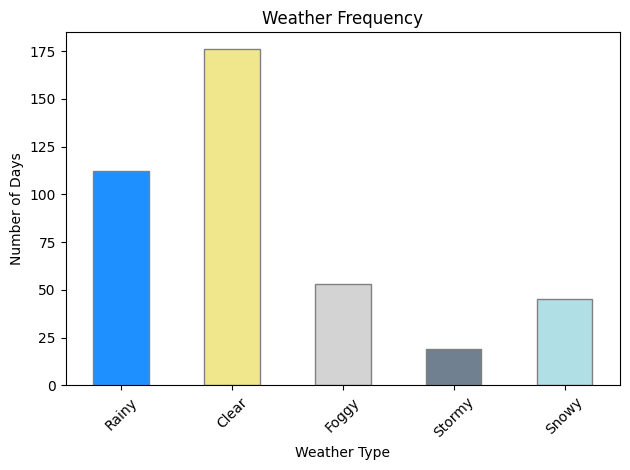

In [6]:
colors = [weather_colors[weather] for weather in weather_types]
weather_frequency.plot(kind = 'bar', color = colors, edgecolor = 'grey')
plt.title('Weather Frequency')
plt.xlabel('Weather Type')
plt.ylabel('Number of Days')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [7]:
from IPython.display import Image, display
image_url = "https://upload.wikimedia.org/wikipedia/commons/5/5d/Easter_Bunny_with_Egg.jpg"
display(Image(url=image_url))


In [8]:
easter_palette = weather_colors
print(easter_palette)

{'Rainy': 'dodgerblue', 'Clear': 'khaki', 'Foggy': 'lightgrey', 'Stormy': 'slategray', 'Snowy': 'powderblue'}


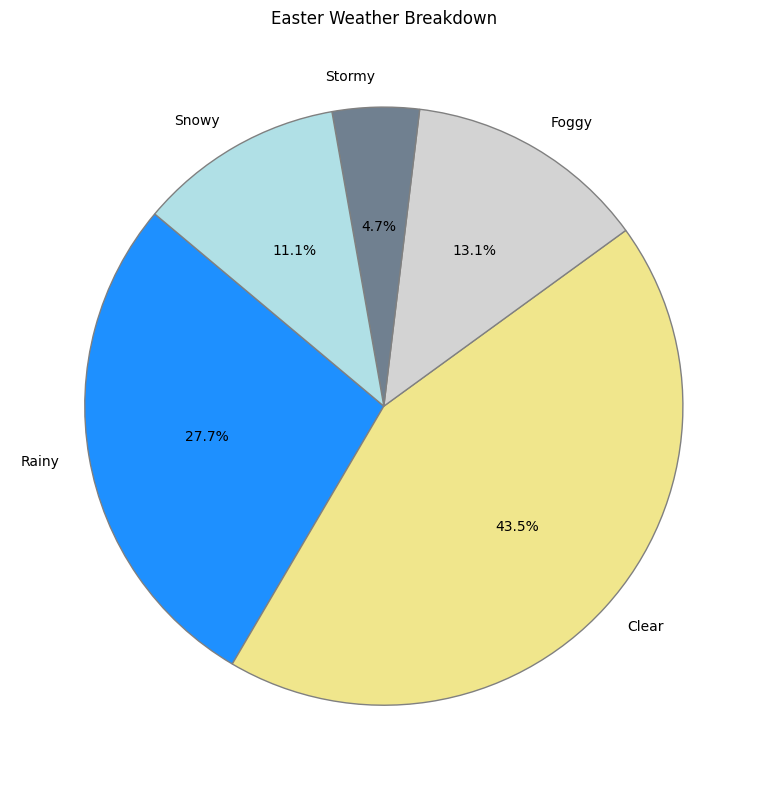

In [9]:
plt.figure(figsize = (8,8))
plt.pie(
    weather_frequency,
    labels = weather_frequency.index,
    colors = [easter_palette[w] for w in weather_frequency.index],
    autopct = '%1.1f%%',
    startangle = 140,
    wedgeprops = {'edgecolor':'grey'}
)
plt.title('Easter Weather Breakdown')
plt.tight_layout()
plt.show()

In [10]:
#df.info()
road_type = df_cleaned['Road_Type']
unique_road_type = road_type.unique()
highway = 0
city_road = 0
mountain_road = 0
rural_road = 0

for i in road_type:
    if i == "Highway":
        highway += 1
    elif i == "City Road":
        city_road += 1
    elif i == "Mountain Road":
        mountain_road += 1
    elif i == "Rural Road":
        rural_road += 1
print(f'''Highway {highway},
City Road {city_road},
Mountain Road {mountain_road},
Rural Road {rural_road}''')

Highway 204,
City Road 120,
Mountain Road 24,
Rural Road 57


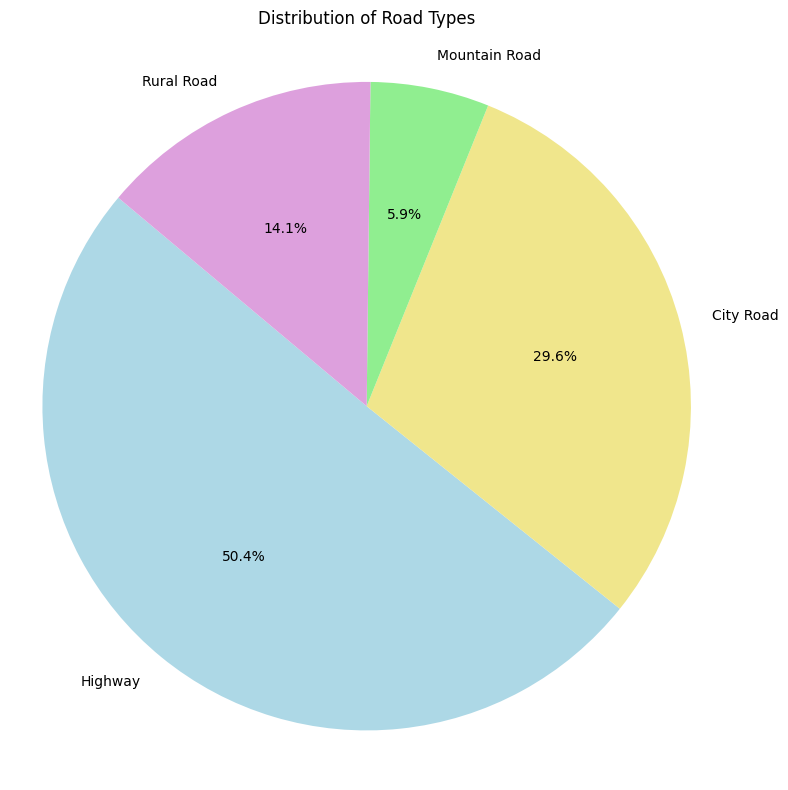

In [11]:
road_counts = [highway, city_road, mountain_road, rural_road]
road_labels = ['Highway', 'City Road', 'Mountain Road', 'Rural Road']
road_colors = ['lightblue', 'khaki', 'lightgreen', 'plum']

plt.figure(figsize = (8,8))
plt.pie(road_counts, labels = road_labels, colors = road_colors, autopct = '%1.1f%%', startangle = 140)
plt.title('Distribution of Road Types')
plt.axis('equal')
plt.tight_layout()
plt.show()

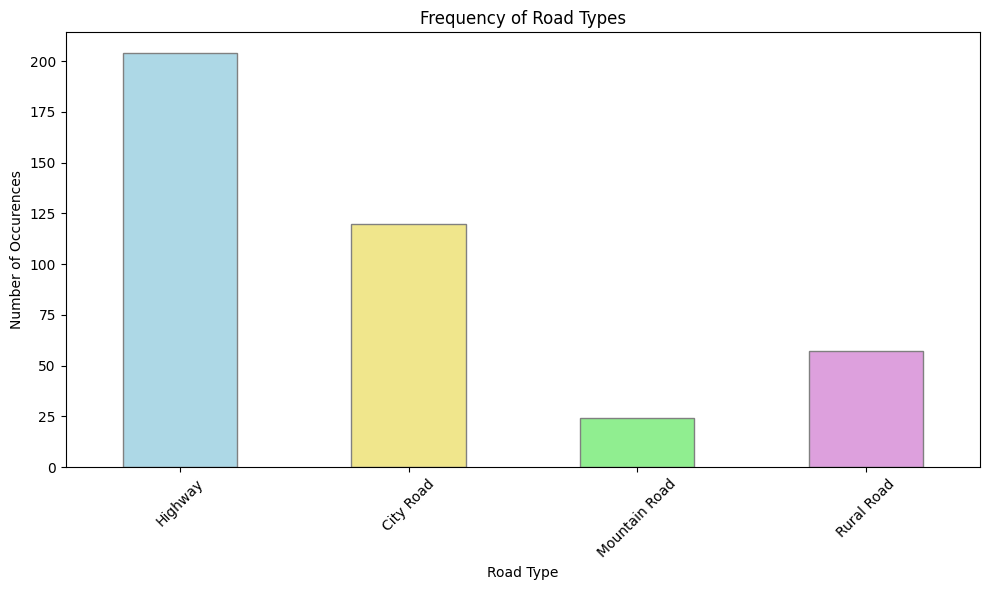

In [12]:
road_series = pd.Series(road_counts, index = road_labels)
plt.figure(figsize=(10,6))
road_series.plot(kind = 'bar', color = road_colors, edgecolor = 'gray')

plt.title('Frequency of Road Types')
plt.xlabel('Road Type')
plt.ylabel('Number of Occurences')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [13]:
columns_to_extract = [
    'Driver_Alcohol', 'Accident_Severity', 'Weather', 'Road_Type',
    'Traffic_Density', 'Speed_Limit', 'Road_Condition', 'Driver_Age', 'Accident'
]
data_vars = {col: df_cleaned[col] for col in columns_to_extract}
accidents = data_vars['Accident']
accident_count = 0
not_an_accident = 0
column_list = []
for col in columns_to_extract:
    globals()[col.lower()] = data_vars[col]
    column_list.append(data_vars[col])
    
for i in accidents:
    if i == 1:
        accident_count += 1
    elif i == 0:
        not_an_accident += 1
        

print(f'Accident Occured: {accident_count}')
print(f'No Accident Occured: {not_an_accident}')


Accident Occured: 119
No Accident Occured: 286


In [14]:
def view_columns():
    for i in data_vars:
        i = print(i)

view_columns()

Driver_Alcohol
Accident_Severity
Weather
Road_Type
Traffic_Density
Speed_Limit
Road_Condition
Driver_Age
Accident


In [15]:
target_columns = [data_vars['Driver_Alcohol'], data_vars['Driver_Age'], data_vars['Road_Type'], data_vars['Road_Condition']]

In [16]:
df_cleaned.loc[:, 'Age_Group'] = pd.cut(
    df_cleaned['Driver_Age'],
    bins = [0, 20, 35,50,65,100],
    labels = ['<20', '21-35', '36-50', '51-65', '65+']
)

summary = df_cleaned.groupby(
    ['Driver_Alcohol', 'Road_Condition', 'Age_Group', 'Road_Type']
)['Accident'].agg(['count','sum']).reset_index()

summary.rename(columns = {'count':'Total_Cases', 'sum':'Accidents'}, inplace = True)
summary['Accident_Rate'] = summary['Accidents'] / summary['Total_Cases']

/tmp/ipykernel_13/4088504544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'Age_Group'] = pd.cut(
/tmp/ipykernel_13/4088504544.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df_cleaned.groupby(


In [17]:
easter_palette_i = list(easter_palette.values())
easter_cmap = LinearSegmentedColormap.from_list("EasterMap", easter_palette_i)

{'Rainy': 'dodgerblue', 'Clear': 'khaki', 'Foggy': 'lightgrey', 'Stormy': 'slategray', 'Snowy': 'powderblue'}


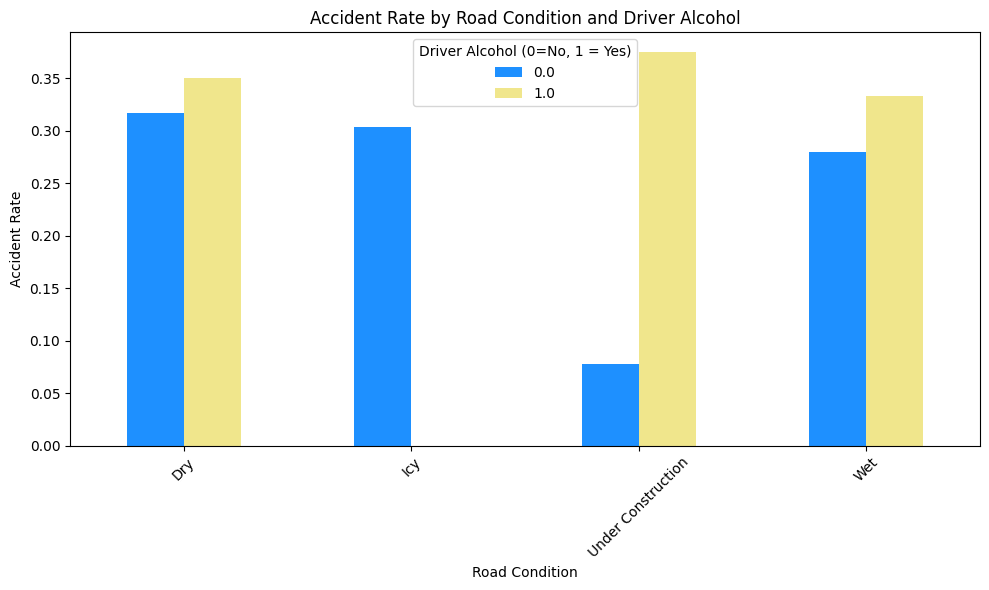

In [18]:
print(easter_palette)

pivot_table = summary.pivot_table(index = 'Road_Condition', columns = 'Driver_Alcohol', values = 'Accident_Rate')
pivot_table.plot(kind = 'bar', figsize = (10,6), color = easter_palette_i)
plt.title('Accident Rate by Road Condition and Driver Alcohol')
plt.xlabel('Road Condition')
plt.ylabel('Accident Rate')
plt.legend(title = 'Driver Alcohol (0=No, 1 = Yes)')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_13/1470320208.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_cleaned.pivot_table(


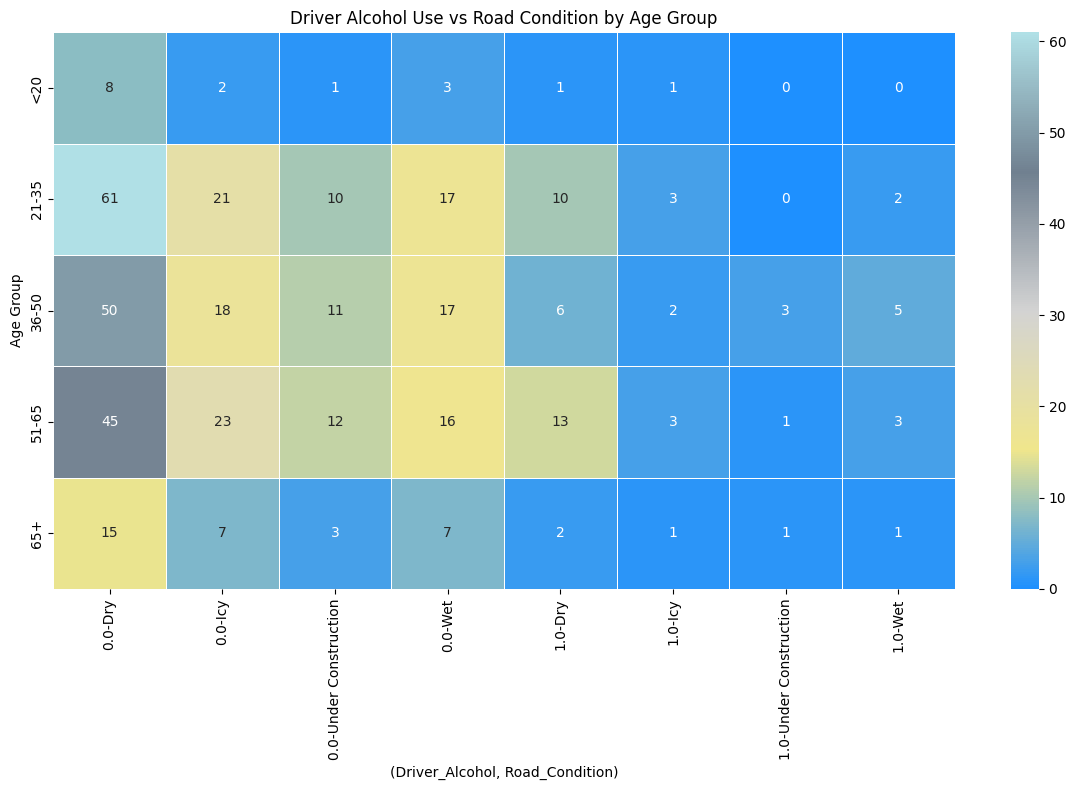

In [19]:
pivot_table = df_cleaned.pivot_table(
    index = 'Age_Group',
    columns = ['Driver_Alcohol', 'Road_Condition'],
    values = 'Accident',
    aggfunc = 'count',
    fill_value = 0
)
easter_cmap = LinearSegmentedColormap.from_list("easter_palette_i", easter_palette_i)
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, annot = True, cmap = easter_cmap, linewidths = 0.5)
plt.title('Driver Alcohol Use vs Road Condition by Age Group')
plt.ylabel('Age Group')
plt.xlabel('(Driver_Alcohol, Road_Condition)')
plt.tight_layout()
plt.show()

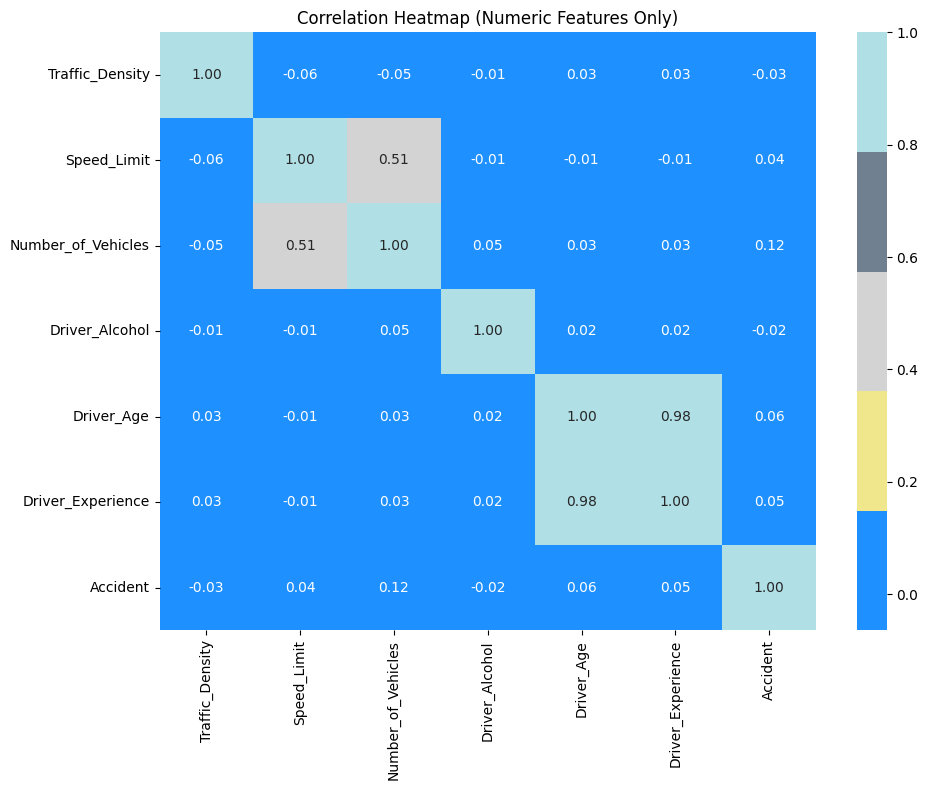

In [20]:
#df_cleaned.describe()
numeric_df = df_cleaned.select_dtypes(include = ['number'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot = True, cmap = easter_palette_i, fmt = '.2f')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.tight_layout()
plt.show()

In [21]:
road_condition_stats = df_cleaned.groupby('Road_Condition')['Accident'].mean()
print(road_condition_stats)

weather_stats = df_cleaned.groupby('Weather')['Accident'].mean()
print(weather_stats)

Road_Condition
Dry                   0.331754
Icy                   0.271605
Under Construction    0.190476
Wet                   0.267606
Name: Accident, dtype: float64
Weather
Clear     0.335227
Foggy     0.320755
Rainy     0.214286
Snowy     0.311111
Stormy    0.263158
Name: Accident, dtype: float64


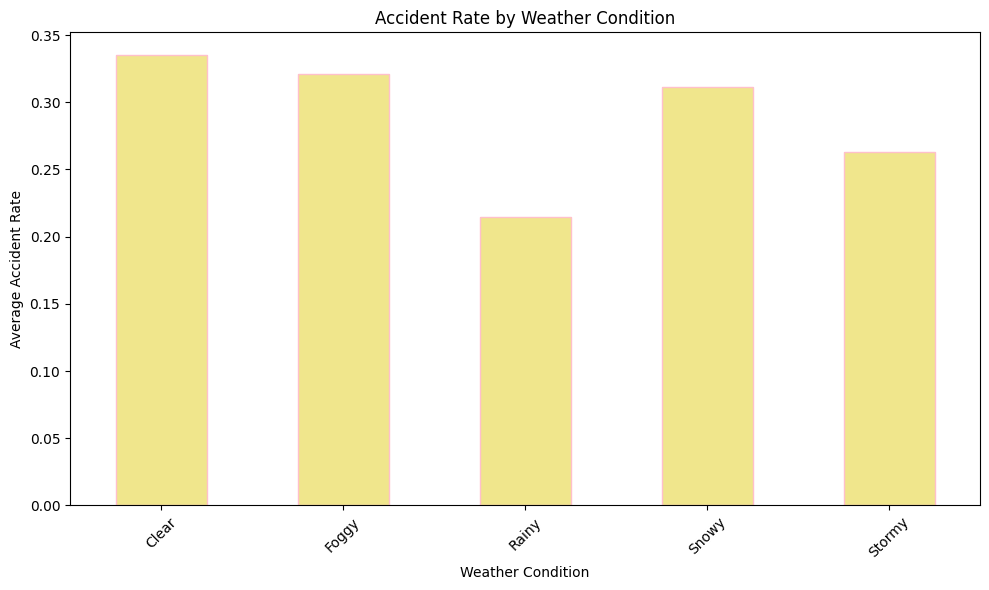

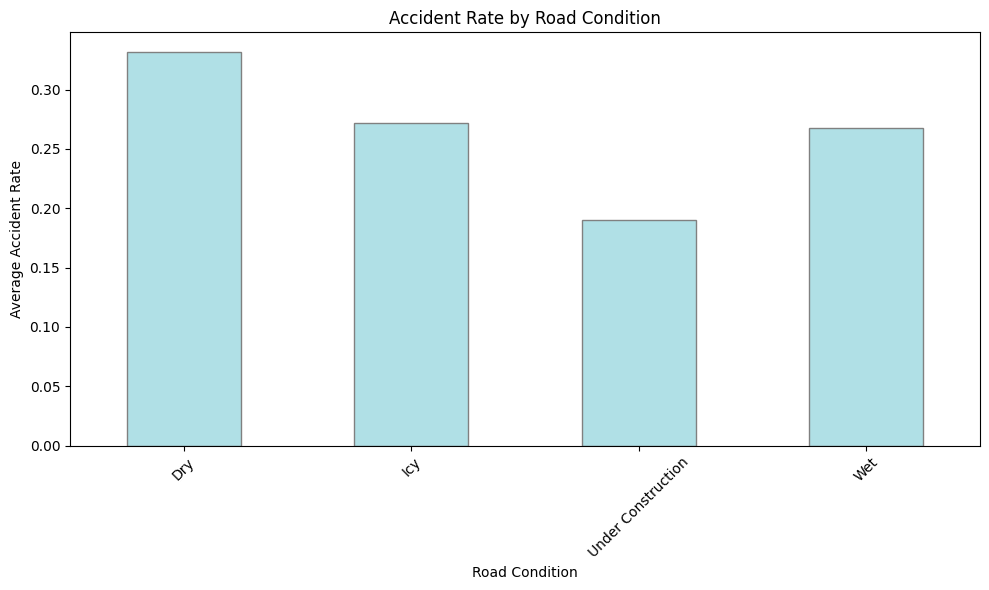

In [22]:
weather_accidents = df_cleaned.groupby('Weather')['Accident'].mean()
weather_accidents.plot(kind = 'bar', color = 'khaki', edgecolor = 'pink', figsize =(10,6))
plt.title('Accident Rate by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Accident Rate')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

road_condition_accidents = df_cleaned.groupby('Road_Condition')['Accident'].mean()
road_condition_accidents.plot(kind = 'bar', color = 'powderblue', edgecolor = 'grey', figsize = (10,6))
plt.title('Accident Rate by Road Condition')
plt.xlabel('Road Condition')
plt.ylabel('Average Accident Rate')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()